In [0]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Q04_Wholesale+customers+data.csv']))
df.head()

Saving Q04_Wholesale+customers+data.csv to Q04_Wholesale+customers+data.csv


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [0]:
#a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols
#& types of variables (continuous, categorical etc.)? (1 MARK)
df.shape

(440, 8)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [0]:
#b. Calculate five-point summary for numerical variables (1 MARK)
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [0]:
#Summarize observations for categorical variables – no. of categories, % observations in each category. 

# Only Channel and  Region are categorical.

cat_col = ['Region','Channel']
for i in cat_col:
  print(f'No of Categories for {i}:{df[i].nunique()}')
  print((df[i].value_counts()/df.shape[0])*100)

No of Categories for Region:3
3    71.818182
1    17.500000
2    10.681818
Name: Region, dtype: float64
No of Categories for Channel:2
1    67.727273
2    32.272727
Name: Channel, dtype: float64


In [15]:
#d. Generate the covariance and correlation tables for the data (1 MARK)
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [16]:
df.cov()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,0.219072,0.022479,-1.001431e+03,1.591511e+03,2.707890e+03,-4.590964e+02,1.419358e+03,7.393256e+01
Region,0.022479,0.599498,5.413960e+02,1.845044e+02,5.662581e+01,-7.910183e+01,-5.473509e+00,9.872201e+01
Fresh,-1001.431156,541.395998,1.599549e+08,9.381789e+06,-1.424713e+06,2.123665e+07,-6.147826e+06,8.727310e+06
Milk,1591.510799,184.504437,9.381789e+06,5.446997e+07,5.108319e+07,4.442612e+06,2.328834e+07,8.457925e+06
Grocery,2707.889812,56.625813,-1.424713e+06,5.108319e+07,9.031010e+07,-1.854282e+06,4.189519e+07,5.507291e+06
Frozen,-459.096397,-79.101833,2.123665e+07,4.442612e+06,-1.854282e+06,2.356785e+07,-3.044325e+06,5.352342e+06
Detergents_Paper,1419.357559,-5.473509,-6.147826e+06,2.328834e+07,4.189519e+07,-3.044325e+06,2.273244e+07,9.316807e+05
Delicassen,73.932564,98.722008,8.727310e+06,8.457925e+06,5.507291e+06,5.352342e+06,9.316807e+05,7.952997e+06


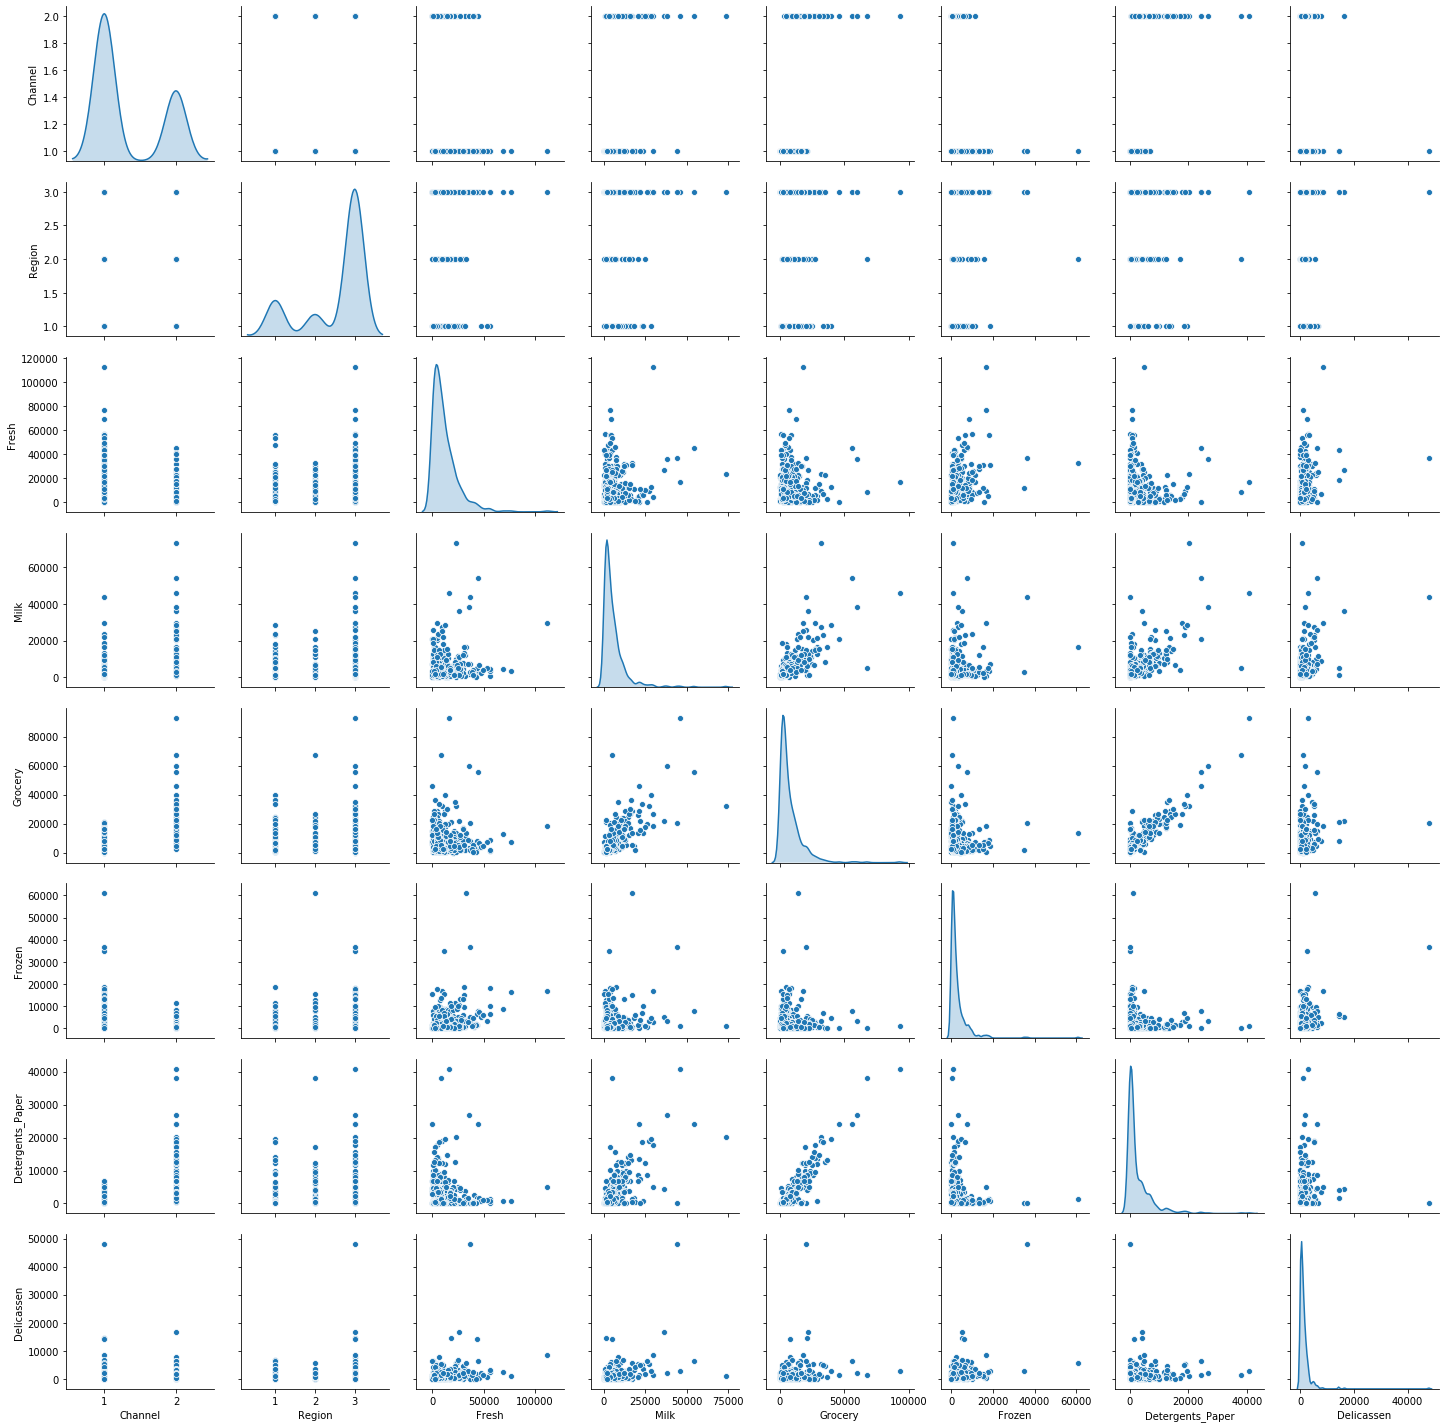

In [21]:
#e. Create Visualization plots to find the relationship amongst the variables. (1 MARK)
import seaborn as sns

sns.pairplot(df,diag_kind='kde')

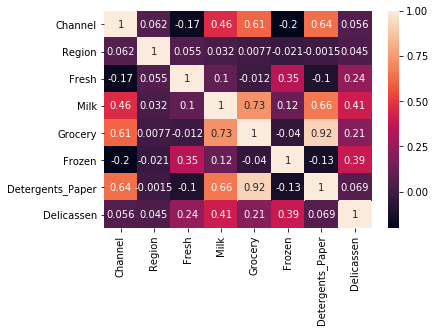

In [23]:
sns.heatmap(df.corr(),annot=True)

In [0]:
#2. How will you decide when to apply PCA based on the correlation? (2 marks) 


###The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent.
In our case we can see that for each columns there is high or low correlation amongst them thus we can use PCA .
Also ,before doing PCA we have to scale the variables.

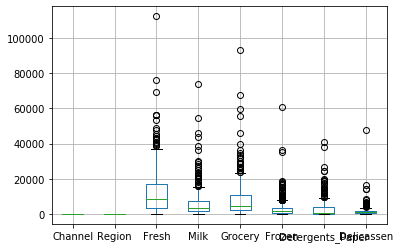

In [33]:
df.boxplot()

In [34]:
# As we can see there are many outliers we have to remove them for PCA to work fine.
q1 = df['Fresh'].quantile(0.25)
q3 = df['Fresh'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit,lower_limit)
df['Fresh']=df['Fresh'].apply(lambda x: upper_limit if x>upper_limit else x)
df['Fresh']=df['Fresh'].apply(lambda x:lower_limit if x<lower_limit else x)

37642.75 -17581.25


In [35]:
# As we can see there are many outliers we have to remove them for PCA to work fine.
q1 = df['Milk'].quantile(0.25)
q3 = df['Milk'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit,lower_limit)
df['Milk']=df['Milk'].apply(lambda x: upper_limit if x>upper_limit else x)
df['Milk']=df['Milk'].apply(lambda x:lower_limit if x<lower_limit else x)

15676.125 -6952.875


In [36]:
# As we can see there are many outliers we have to remove them for PCA to work fine.
q1 = df['Grocery'].quantile(0.25)
q3 = df['Grocery'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit,lower_limit)
df['Grocery']=df['Grocery'].apply(lambda x: upper_limit if x>upper_limit else x)
df['Grocery']=df['Grocery'].apply(lambda x:lower_limit if x<lower_limit else x)

23409.875 -10601.125


In [37]:
# As we can see there are many outliers we have to remove them for PCA to work fine.
q1 = df['Frozen'].quantile(0.25)
q3 = df['Frozen'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit,lower_limit)
df['Frozen']=df['Frozen'].apply(lambda x: upper_limit if x>upper_limit else x)
df['Frozen']=df['Frozen'].apply(lambda x:lower_limit if x<lower_limit else x)

7772.25 -3475.75


In [38]:
q1 = df['Detergents_Paper'].quantile(0.25)
q3 = df['Detergents_Paper'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit,lower_limit)
df['Detergents_Paper']=df['Detergents_Paper'].apply(lambda x: upper_limit if x>upper_limit else x)
df['Detergents_Paper']=df['Detergents_Paper'].apply(lambda x:lower_limit if x<lower_limit else x)

9419.875 -5241.125


In [39]:
q1 = df['Delicassen'].quantile(0.25)
q3 = df['Delicassen'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit,lower_limit)
df['Delicassen']=df['Delicassen'].apply(lambda x: upper_limit if x>upper_limit else x)
df['Delicassen']=df['Delicassen'].apply(lambda x:lower_limit if x<lower_limit else x)

3938.25 -1709.75


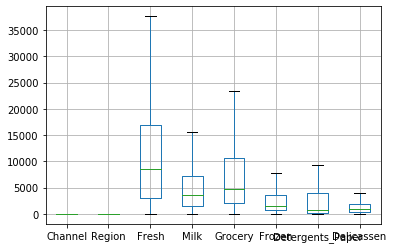

In [40]:
df.boxplot()

In [41]:
#Apply PCA on the above dataset and determine the number of PCA components to be used so that 95%
#of the variance in data is explained by the same. (8 marks)


# Label encoding for the Channel and Region 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Channel'] = le.fit_transform(df.Channel.values)
df['Region'] = le.fit_transform(df.Region.values)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,2,12669.0,9656.0,7561.0,214.0,2674.0,1338.00
1,1,2,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00
2,1,2,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25
3,0,2,13265.0,1196.0,4221.0,6404.0,507.0,1788.00
4,1,2,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25


In [42]:
from sklearn.preprocessing import StandardScaler
a = df.columns
sc =  StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df),columns=a)
df_scaled.head()
# Now the data has been scaled to a same standard , we can apply PCA on it .


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
pcaDF = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3'])
pcaDF


,pc1,pc2,pc3
0,675.969627,2835.235730,2100.540832
1,-5037.834974,3614.893678,2593.222648
2,-5277.825585,1671.771887,3059.244177
3,3153.017616,-4480.670872,381.970922
4,11212.456226,2257.181171,595.705259
...,...,...,...
435,16758.033502,13210.365104,4044.987689
436,27344.655078,-2470.907129,-773.685460
437,-1044.046023,20728.294689,-485.649047
438,67.259994,-6286.301700,-622.033140


In [50]:
pca.explained_variance_ratio_


array([0.58601648, 0.34068282, 0.03483305])

## As we can see that 58% of data is explained by first PCA component and 34 percent is explained by second component and 3 % is expalined by 3rd Component.
## Though ,together they are explaining about 95% of the dataset.


In [0]:
##Use PCA dimensions to cluster the data. Apply K-means/ Agglomerative clustering based on the data.

# there are 3 PCA components which are explaining 95% of the data thus taking n_clusters as 3 and initiatin k_means.

kmeans = KMeans(n_clusters=3, n_init = 15, random_state=10)

In [53]:
kmeans.fit(pcaDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [0]:
centroids=kmeans.cluster_centers_

In [0]:
centroid_df = pd.DataFrame(centroids, columns = list(pcaDF) )

In [56]:
centroid_df


,pc1,pc2,pc3
0,14733.328513,1337.594293,-37.167048
1,-3513.070488,-5219.966396,240.135687
2,-8393.910423,10097.076907,-491.254469


In [57]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3520.000000
1,2,2313.139973
2,3,1930.376971
3,4,1689.831888
4,5,1495.241212
5,6,1365.197604
6,7,1267.134598
7,8,1195.913224
8,9,1128.123532
9,10,1072.177615


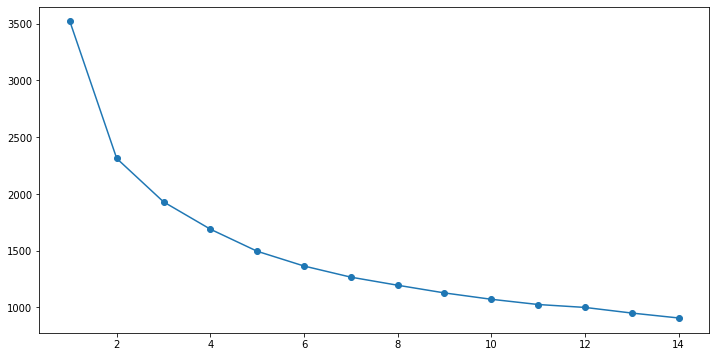

In [58]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [59]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(df_scaled)
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df
#Find the optimal K Value. (3 marks)

# 3 will be the optimal as it has obtained and validated from PCA also.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.384802,0.098554,-0.333083,0.974042,1.156618,-0.438847,1.276192,0.248912
1,-0.557991,0.044140,1.042961,-0.061237,-0.299930,1.311035,-0.555292,0.617428
2,-0.628892,-0.083674,-0.270498,-0.596084,-0.602361,-0.327104,-0.560509,-0.446147


In [0]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [0]:
df_labeled = df_scaled.join(df_labels)

In [64]:
df_clusters = df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=df_clusters.get_group(0)
df1=df_clusters.get_group(1)
df2=df_clusters.get_group(2)
finaldf = pd.concat([df0,df1,df2])
finaldf.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
415,1.448652,0.590668,-0.344666,0.227646,0.199669,-0.339250,0.390605,0.561345,0
222,-0.690297,-1.995342,-0.619276,-0.897796,-0.664798,2.073910,-0.727371,-0.824259,2
246,-0.690297,-1.995342,-0.242410,-0.598119,-0.828555,-0.303499,-0.668136,-0.607036,2
293,1.448652,-0.702337,-0.721727,1.381846,0.794142,-0.667240,1.211725,-0.485946,0
362,-0.690297,0.590668,-0.905552,-0.786872,-0.725960,-0.809411,-0.753584,-0.512753,2


In [65]:
kmeans.inertia_

1930.376970903384

####Apply Clustering and find out if the data points have been clustered correctly using appropriate
visualization (6 marks)

## silhouette_score analysis

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3503392454619006


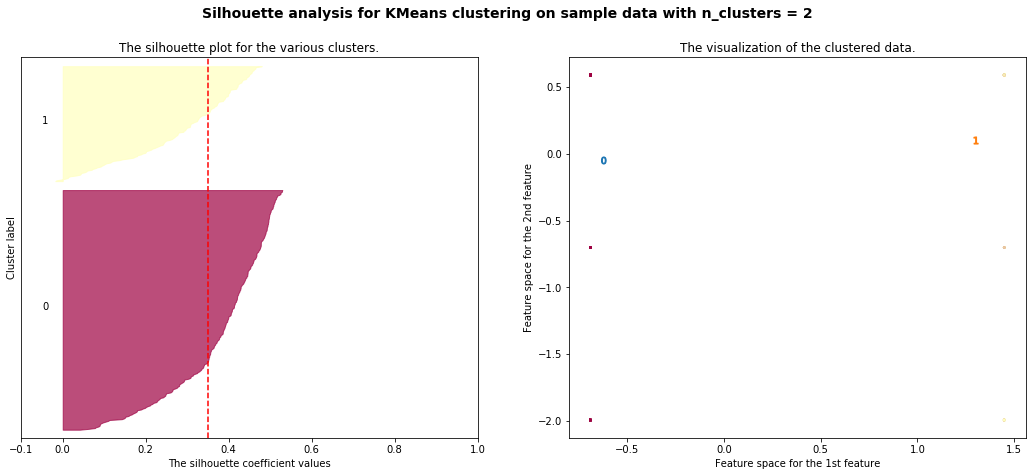

For n_clusters = 3 The average silhouette_score is : 0.2853544070734272


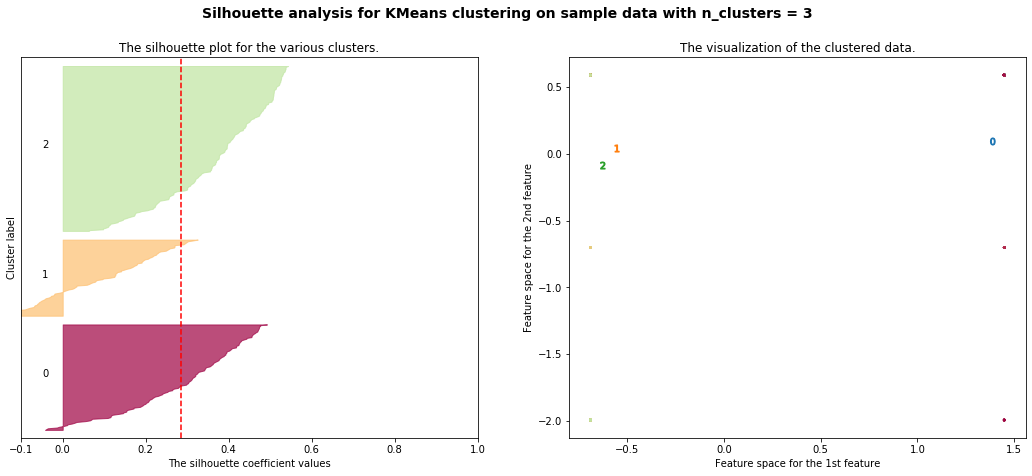

For n_clusters = 4 The average silhouette_score is : 0.2740120591692105


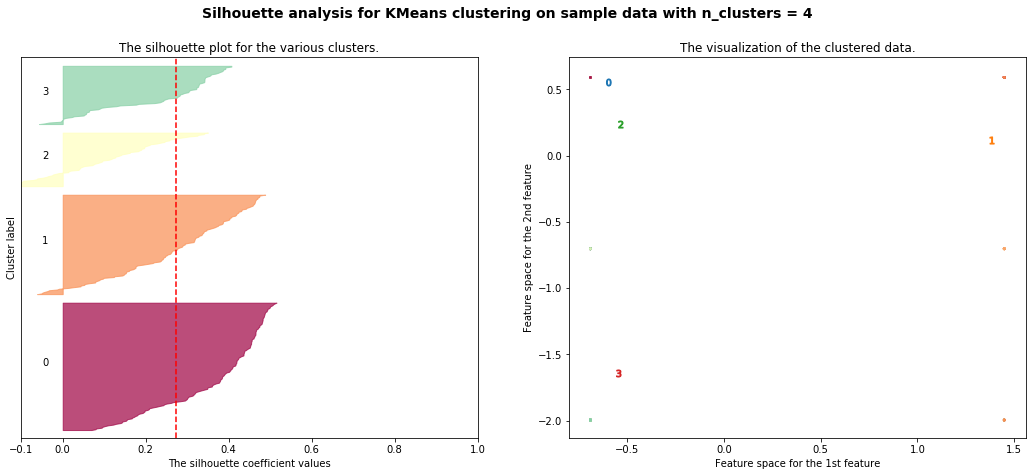

For n_clusters = 5 The average silhouette_score is : 0.2631832334110158


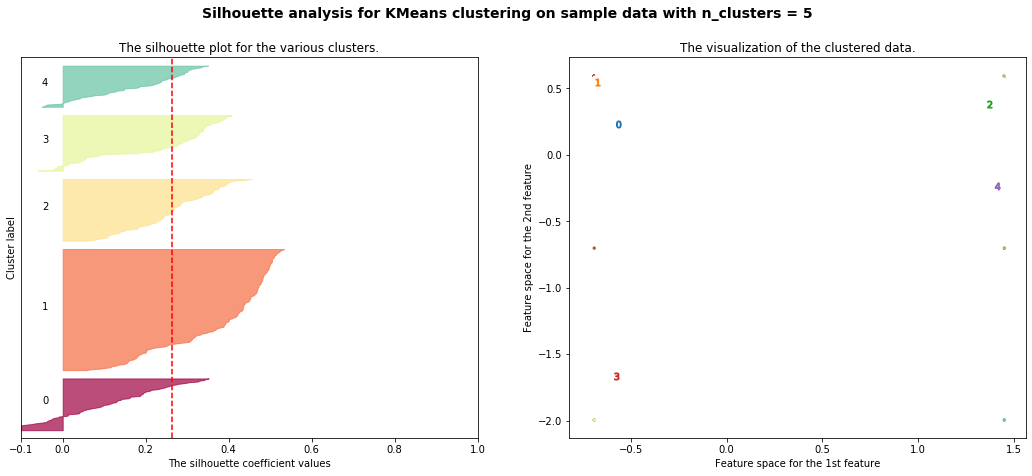

For n_clusters = 6 The average silhouette_score is : 0.26700527659946316


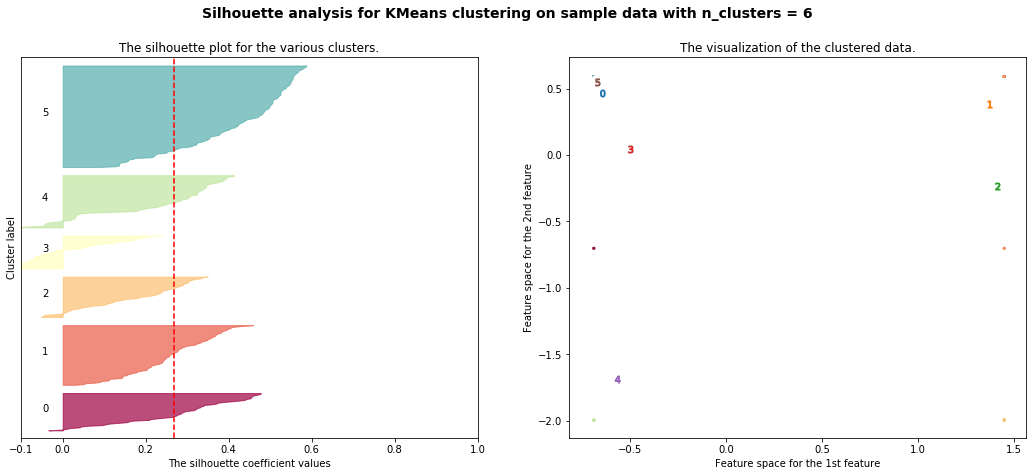

For n_clusters = 7 The average silhouette_score is : 0.2744636840865088


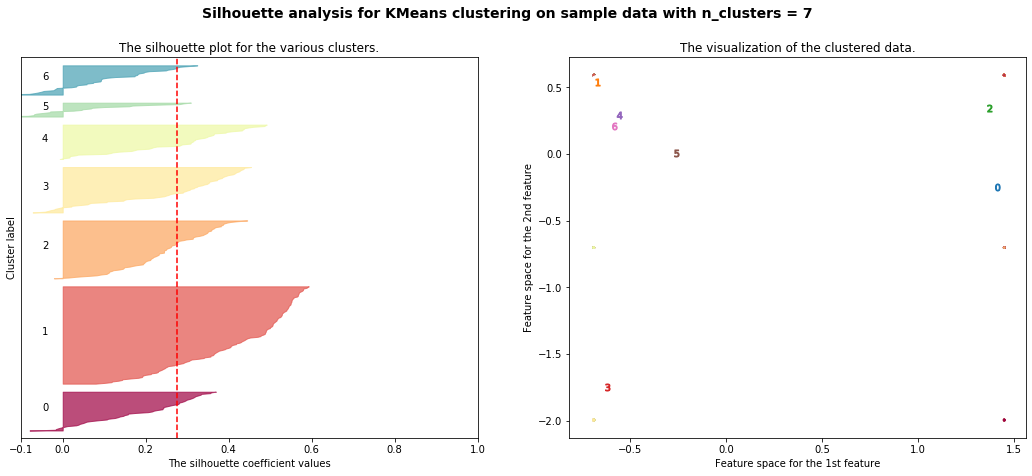

In [67]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Average for 3 clusters is accepatable
## inertia is also acceptable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabbaa06fd0>,
      dtype=object)

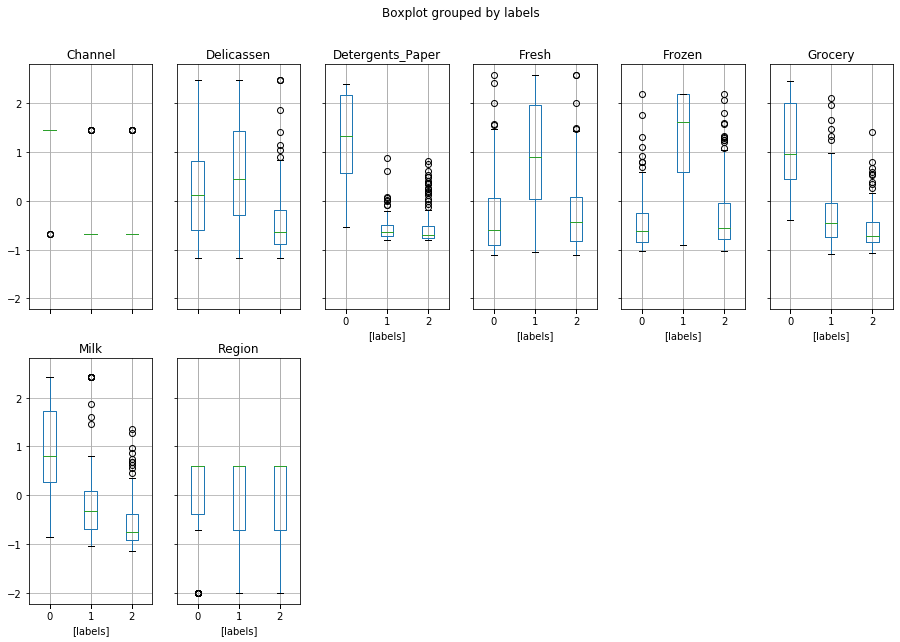

In [68]:
finaldf.boxplot(by = 'labels',  layout=(2,6), figsize=(15, 10))

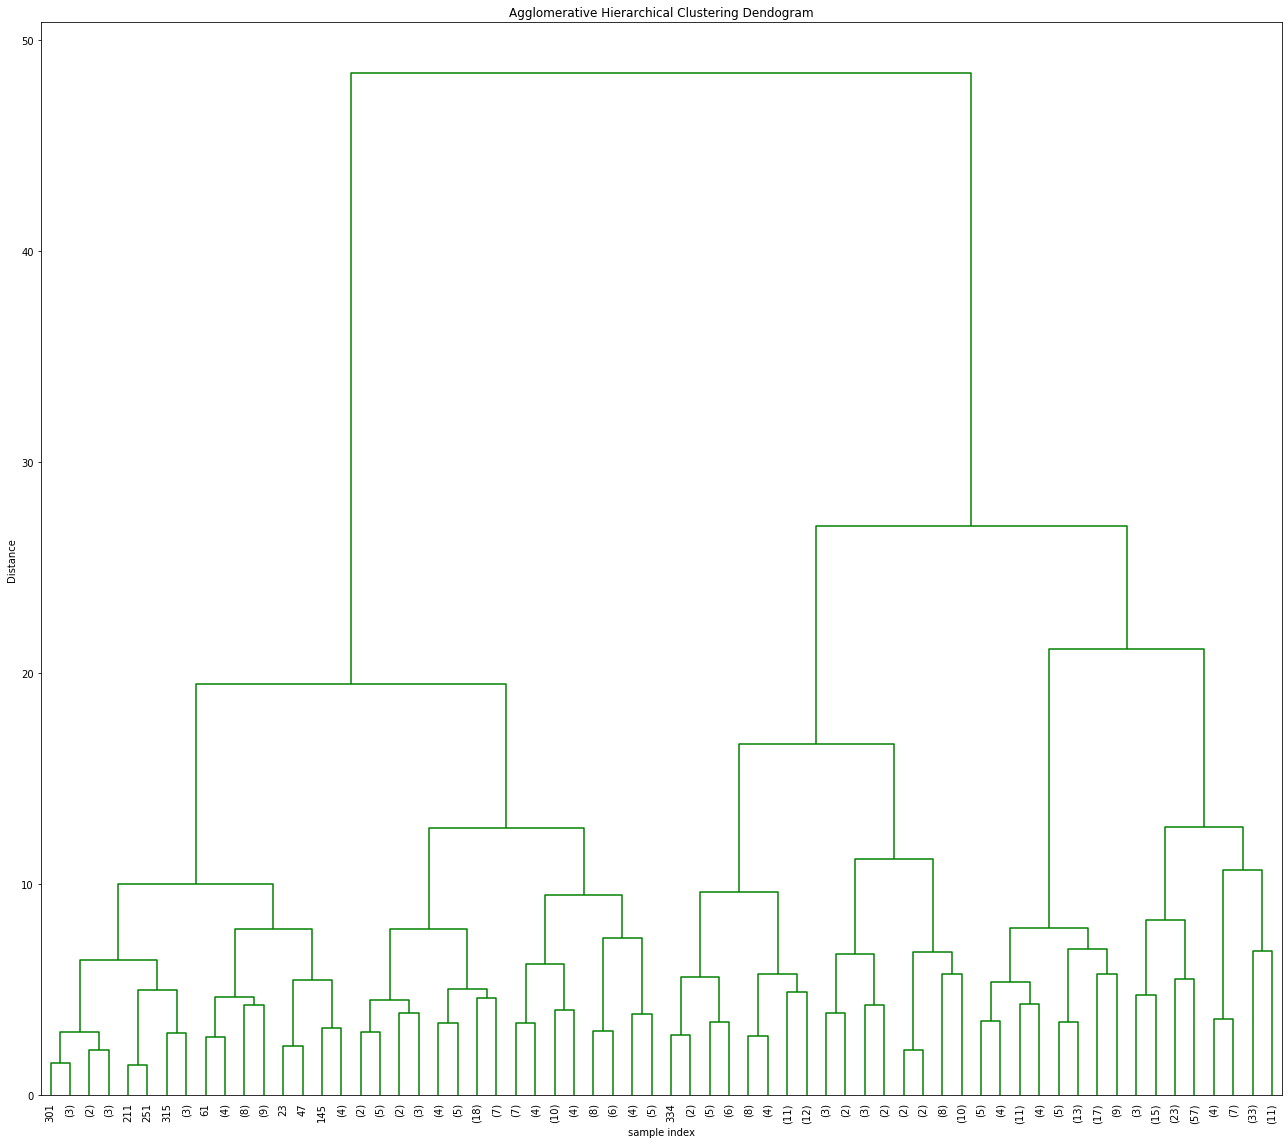

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

## The Prominence of 3 clusters can be seen from the dendrogram.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


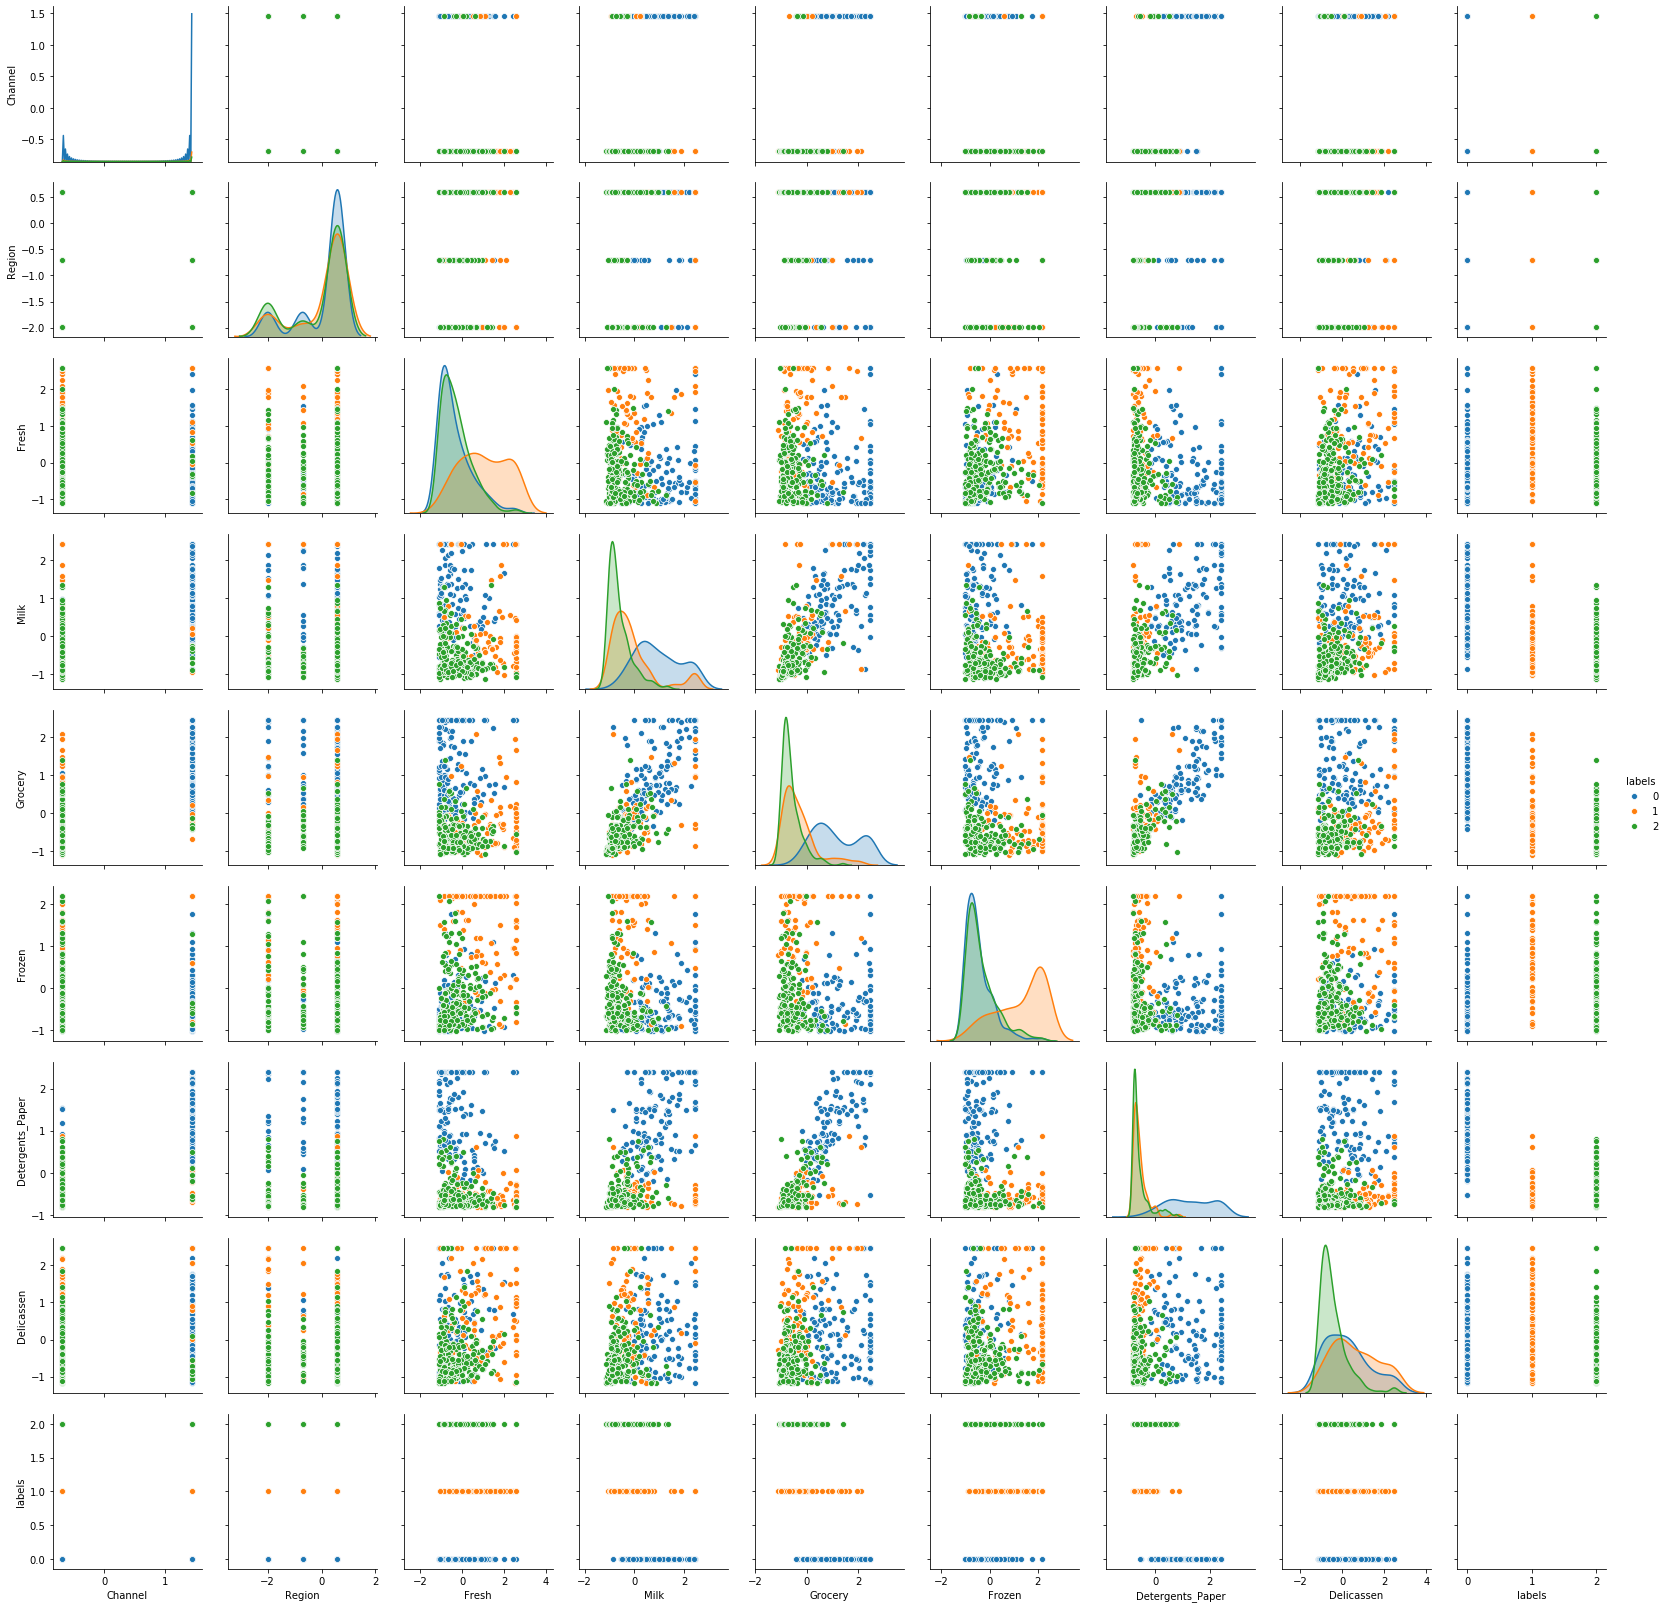

In [73]:
sns.pairplot(diag_kind='kde',hue='labels',data=finaldf)

In [74]:
pca = pd.concat([pcaDF,finaldf['labels']],axis=1)
pca.columns = ['pc1','pc2','pc3','clusters']
print(pca.shape)
pca.head()

(440, 4)


,pc1,pc2,pc3,clusters
0,675.969627,2835.235730,2100.540832,0
1,-5037.834974,3614.893678,2593.222648,0
2,-5277.825585,1671.771887,3059.244177,0
3,3153.017616,-4480.670872,381.970922,1
4,11212.456226,2257.181171,595.705259,1


In [75]:
pca.clusters.value_counts()


2    209
0    134
1     97
Name: clusters, dtype: int64

In [0]:
# plt.figure(figsize=[16,8])
# sns.scatterplot(x='pc1', y='pc2', hue= 'clusters', data=pca,palette='Set1')

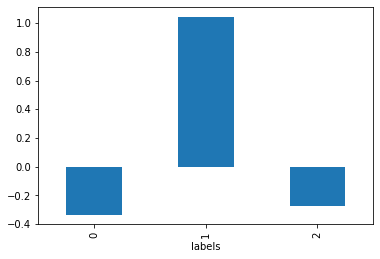

In [81]:
finaldf.groupby('labels').Fresh.mean().plot(kind='bar')

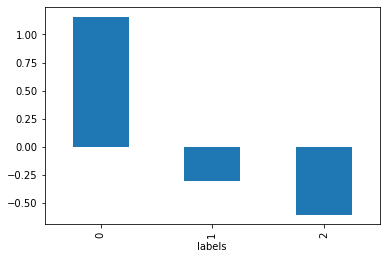

In [84]:
finaldf.groupby('labels').Grocery.mean().plot(kind='bar')

#Write down a business interpretation/explanation of the model – which variables are affecting
the target the most and explain the relationship. What changes from the base model had the
most effect on model performance? (2 marks)

Making the change to the delivery service means that products will be delivered fewer times in a week.

The wholesale distributor can identify the clusters to conduct the A/B test on, but the test should be done on one cluster at a time because the two clusters represent different types of customers, so their delivery needs might be different, and their reaction to change will, thus, be different. In other words, the control and experiment groups should be from the same cluster, at a time.
 Since each customer has a customer segment it best identifies with (depending on the clustering algorithm applied), we can consider ‘customer segment’ as an engineered feature for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a customer segment to determine the most appropriate delivery service.